I'm not convinced that presidents actually exert much of an effect on broad market indeces. Their time in office is not sufficient to move an economy, and the lag from policy to effect makes it difficult to attribute changes in the economy to a certain president. Presidential influence most likely comes through their Federal Reserve Chairperson appointment, which is where monetary policy is set. Finally, life happens regardless of who is in office--Clinton didn't cause the internet boom that benefitted the markets during his time and neither can we blame Bush for the housing crash that tanked the markets.

Presidents, then, take more credit than they deserve and receive more blame than they should for movements in the market.
Trump, however, has certainly labelled himself as a saviour of the financial markets. So for this analysis, we will look solely at market movements during presidential terms to compare how the markets performed.

Here, we'll compare how markets move from the start and end of each president's term(s).

In [135]:
# import dependencies
import pandas as pd
import numpy as np
import pandas_datareader as web
import datetime as dt

import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')

In [214]:
# date range for start of Clinton campaign and end of Trump campaign
start = dt.date(1993, 1, 20)
end = dt.date(2021, 1, 21)

In [157]:
# tickers for sp500, dow, nasdaq, and tsx
tickers = ['^GSPC', '^DJI', '^IXIC','^GSPTSE']

In [158]:
# import into df
dict_price = {t: web.get_data_yahoo(t, start, end)['Adj Close']
             for t in tickers}

In [159]:
df_price = pd.DataFrame(dict_price)
df_price = df_price.dropna()
df_price.columns = ['S&P500', 'Dow', 'Nasdaq', 'S&P/TSX']

In [160]:
# manually enter start and end of every president's terms
clin_start = start
clin_end = dt.date(2001, 1, 20)

bush_start = dt.date(2001, 1, 20)
bush_end = dt.date(2009, 1, 20)

obama_start = dt.date(2009, 1, 20)
obama_end = dt.date(2017, 1, 20)

trump_start = dt.date(2017, 1, 20)
trump_end = dt.date(2021, 1, 20)

In [162]:
# function to make total returns from closing prices
def get_growth(df_price_list):
    dr = df_price_list.pct_change().dropna()
    drplus1 = dr + 1
    tr = (drplus1.cumprod() - 1) * 100
    
    return tr

In [206]:
# load dt objects into dict to make parsing easier
dict_pres_dates = {'Clinton':(clin_start, clin_end),
                   'Bush': (bush_start, bush_end),
                   'Obama': (obama_start, obama_end),
                   'Trump': (trump_start, trump_end)}

In [209]:
# dict comprehension to make new dict for each pres with corresponding returns for their presidential term
dict_pres_price = {'{}'.format(k_pres): df_price.loc[v_date[0]:v_date[1]]
                 for k_pres, v_date in dict_pres_dates.items()}

In [210]:
# make total returns from prices for each pres term
dict_pres_tr = {'{}'.format(k):get_growth(v)
               for k, v in dict_pres_price.items()}

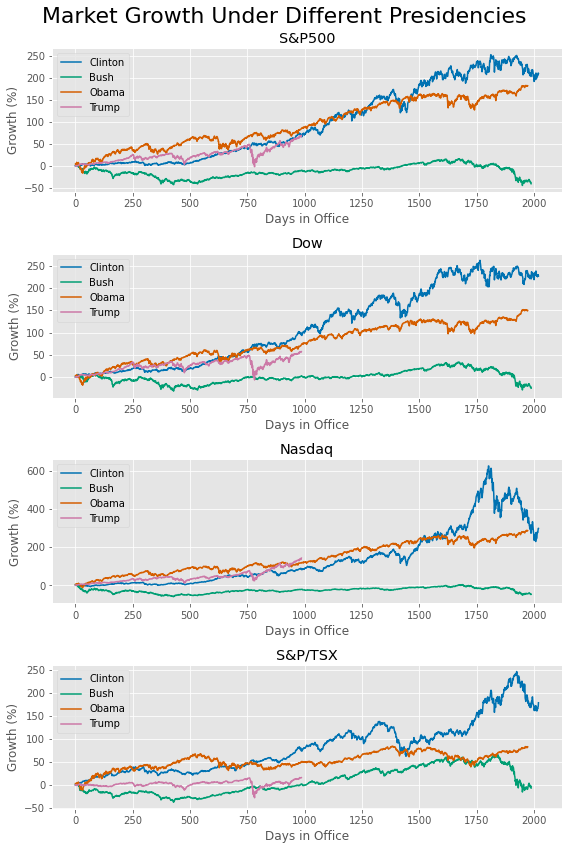

In [213]:
# visualize
fig, ax = plt.subplots(4, figsize=(8,12))

fig.suptitle('Market Growth Under Different Presidencies', fontsize=22)

for (i, tick) in enumerate(df_price.columns):
    for pres in list(dict_pres_tr.keys()):
        ax[i].plot(dict_pres_growth[pres][tick].values, label=pres)
        ax[i].legend(loc=2)
        ax[i].set_title(tick)
        ax[i].set_xlabel('Days in Office')
        ax[i].set_ylabel('Growth (%)')
        

fig.tight_layout()
plt.show()
#plt.savefig('pres_market_growth', dpi=300)

Main takeaways:
* Trump didn't do so hot for the S&P500, the Dow, and the TSX
* At the end of Trump's term, the Nasdaq had performed better than it did during Obama's first term